In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [11]:
# Nuestro objetivo será predecir la cantidad de ventas a partir de la inversión en publicidad en diferentes medios.

advertising = pd.read_csv('data/advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Gastos de publicidad en miles de USD

print(advertising.shape)
advertising.head(3)

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


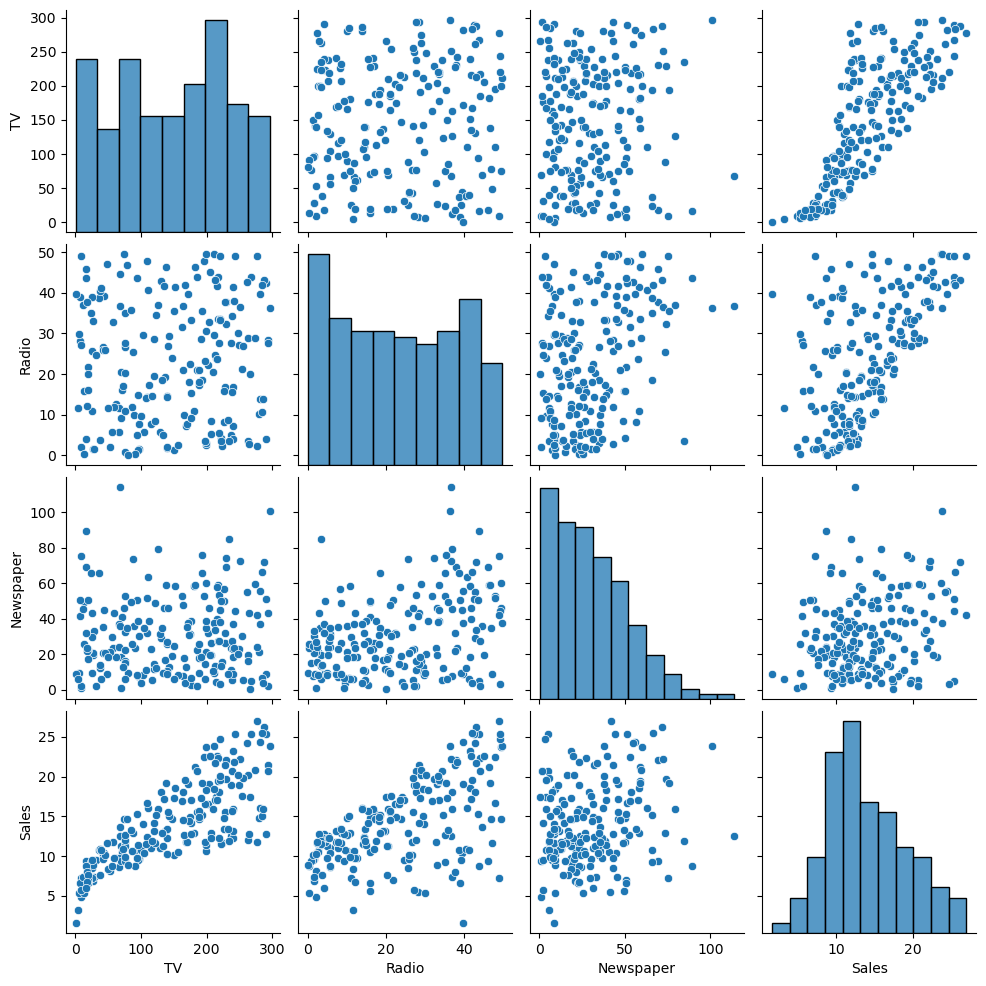

In [9]:
# Visualizamos los datos

sns.pairplot(advertising);

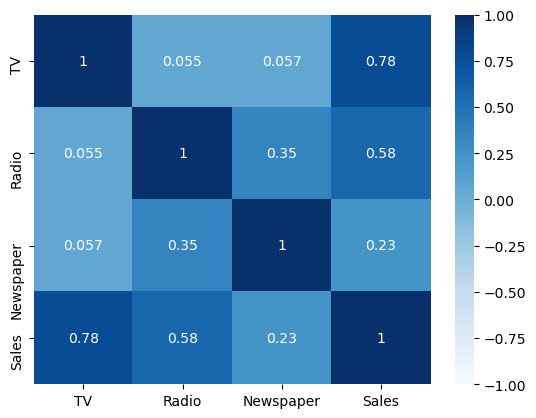

In [10]:
# Visualizamos la matriz de correlación

sns.heatmap(advertising.corr(), annot=True, vmin=-1, cmap='Blues');

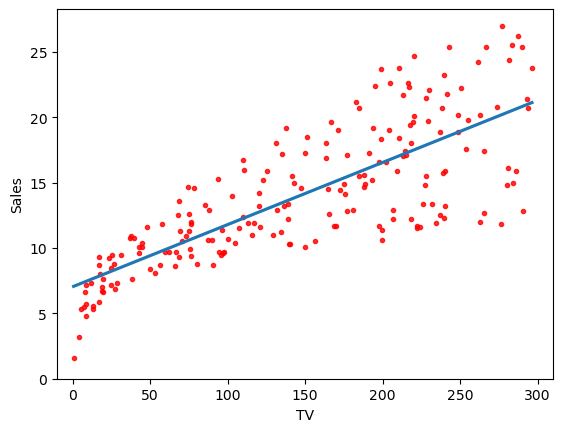

In [12]:
# Como el primer objetivo es hacer un modelo de regresión simple, 
## vamos a elegir la variable TV, ya que es la que muestra una correlación mayor con nuestra variable objetivo.
# Visualizamos un scatter plot entre TV y Sales. 


sns.regplot(data = advertising, x = "TV", y = "Sales", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [13]:
# Generamos el modelo ML

# Seleccionamos clase LinearRegression de modelo de clasificación

from sklearn.linear_model import LinearRegression

In [14]:
# El hiperparámetro del modelo fit_intercept lo seteamos True para ajustar el intercepto

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [15]:
# Preparamos la matriz de features y vector target

feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.Sales

In [16]:
# Separaramos los sets de entrenamiento y de testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [17]:
# Ajustamos el modelo a los datos de entrenamiento

model.fit(Xtrain, ytrain)

LinearRegression()

In [21]:
# Verificamos los valores de 𝛽0^y 𝛽1^ inspeccionando los atributos intercept_ y coef_, respectivamente.
# Estos dos parámetros representan la pendiente y el intercepto del ajuste lineal simple a los datos.

model.coef_

array([0.04802945])

In [22]:
model.intercept_

6.91197261886872

In [23]:
# Con el modelo entrenado, vamos a predecir las etiquetas del conjunto de test
# A partir de un valor conocido en gasto en publicidad en TV de 200 miles de dólares, 
## nuestro modelo estima que un total de ventas aproximado de 16,52 mil unidades.

test = 200
model.intercept_ + model.coef_*test

array([16.51786263])

In [24]:
ypred = model.predict(Xtest)
ypred

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

In [25]:
# Evaluamos la performance del modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 2.46
MSE: 10.31
RMSE: 3.21
R2: 0.56


In [26]:
# MAE (error absoluto medio - Mean Absolut Error): es la media del valor absoluto de los errores. Es el error promedio.

# MSE (error cuadrático medio - Mean Squared Error): es la media de los errores al cuadrado. "Penaliza" errores grandes,
## de ahí que eleve los valores al cuadrado.

# RMSE (error cuadrático medio raíz - Root Mean Squared Error): es la raíz cuadrada de la media de los errores al cuadrado.
## Es comparable con la variable objetivo, ya que tiene las mismas unidades que la 𝑦

# 𝑅2: es la proporción de la varianza total de 𝑦 explicada por el modelo.

# Con excepción del 𝑅2, todas éstas son funciones de pérdida porque queremos minimizarlas.
# El 𝑅2, por su parte, cuanto más próximo a 1 se encuentre, mejor.